In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep = ';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [3]:
df.head(6)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0


In [4]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [5]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
df.shape

(2075259, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [8]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df.values

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [10]:
# mark all missing values
#df.replace('?', 'nan', inplace=True)

In [11]:
# add a column for for the remainder of sub metering
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [12]:
values

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]],
      dtype=float32)

In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.099998


In [14]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
sub_metering_4           25979
dtype: int64

In [15]:
df.fillna(method= 'ffill', inplace= True)

In [16]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64

### Creating plots for visualization

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


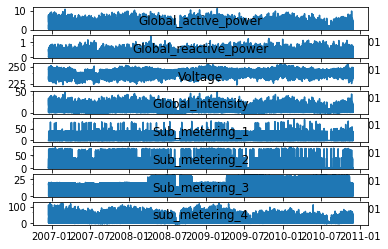

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [17]:
for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])
    plt.title(name, y=0)
plt.show()
plt.figure(figsize=(10,6))

In [18]:
len(df.columns)

8

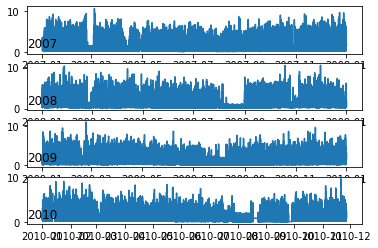

In [19]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure()
for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]

# get all observations for the year
    result = df[str(year)]
# plot the active power for the year
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')
plt.show()

We can continue to zoom in on consumption and look at active power for each of the 12 months of 2007.

This might help tease out gross structures across the months, such as daily and weekly patterns.

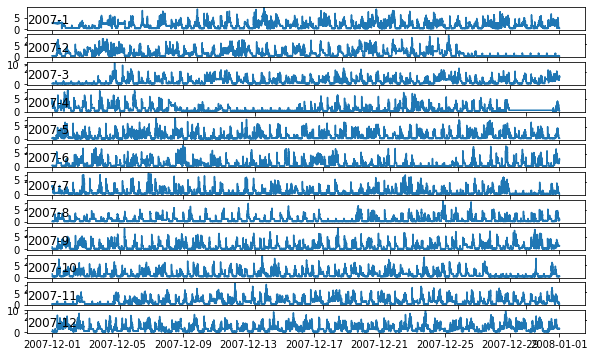

<Figure size 432x288 with 0 Axes>

In [20]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,6))
for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = df[month]
# plot the active power for the month
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(month, y=0, loc='left')
plt.show()

plt.tight_layout()

### Working accoridng to the lessons

In [21]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')

In [22]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq=None)

In [23]:
#Downsample to daily data points
df_daily = df.resample('D').sum()
print(df_daily)

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
2006-12-21             1717.112                144.166  347100.89   
2006-12-22             2341.338                186.906  347305.75   
2006-12-23             4773.386                221.470  345795.95   
2006-12-24             2550.012                149.900  348029.91   
2006-12-25             2743.120                240.280  350495.90   
2006-12-26             3934.110                165.102  347940.63   
2006-12-27             1528.760                178.902  351025.00   
2006-12-28             2072.638   

In [24]:
# downsampling to monthly data points
df_monthly = df.resample('M').mean()
print(df_monthly)

            Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-31             1.901537               0.131400  241.440835   
2007-01-31             1.546085               0.132683  240.904831   
2007-02-28             1.401165               0.113634  240.519177   
2007-03-31             1.318606               0.114747  240.513524   
2007-04-30             0.856787               0.126467  239.127693   
2007-05-31             0.985862               0.115343  235.178364   
2007-06-30             0.826887               0.146355  238.877480   
2007-07-31             0.668133               0.128498  237.678656   
2007-08-31             0.763909               0.112822  237.936632   
2007-09-30             0.969442               0.126019  239.423948   
2007-10-31             1.103945               0.093458  239.725907   
2007-11-30             1.294496               0.096552  240.869308   
2007-12-31          

Text(0.5, 1.0, 'Downsampled Data')

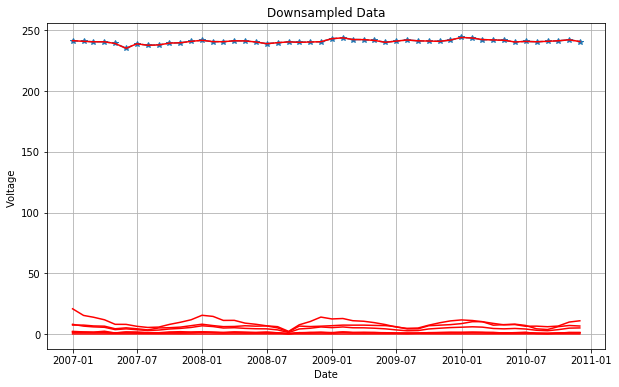

In [25]:
plt.figure(figsize=(10,6))
plt.plot(df_monthly.index, df_monthly.Voltage , '--',marker='*')
plt.plot(df_monthly, 'red')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Voltage ')
plt.title('Downsampled Data')  ## this is just trying out a visualization, more insights from the statistical test

C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Precious\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDe

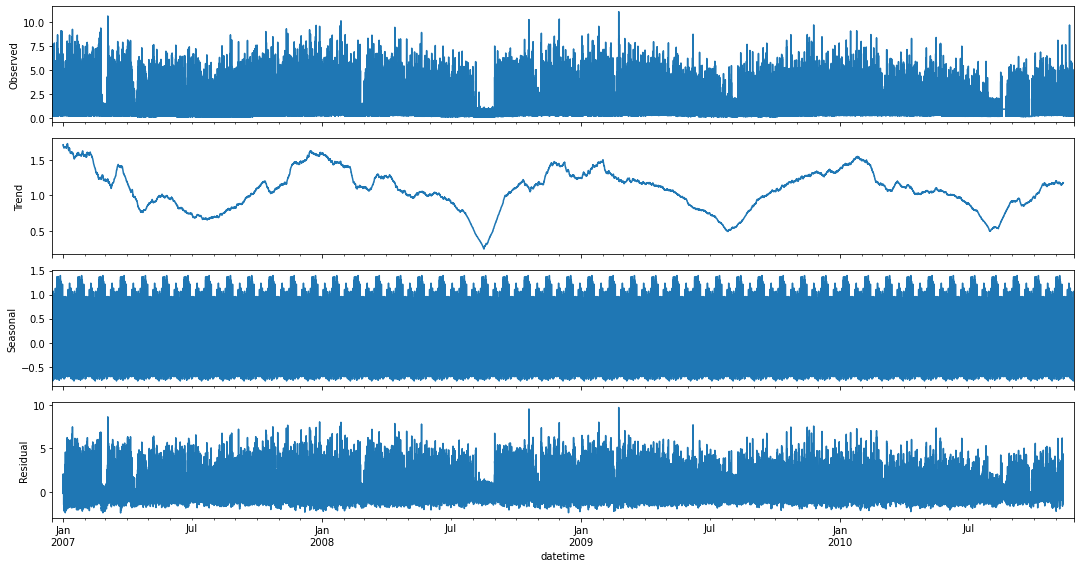

In [26]:

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30) )
decompose_series.plot()
plt.show()

## Time Series Specific Exploratory Methods

### Running for Voltage

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

    Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

    p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In [27]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Voltage'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.906902547161025
p-value: 0.044551192944495735
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816


In [28]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Voltage'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -2.5830134022383375
p-value: 0.09655911979111459
No. of lags used: 1
No. of observations used : 46
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


We can observe here that for monthly we had a non stationary state while Daily showed it was stationary..
This simply means we can carry out log differencing on the montly to make it staionary, that is if we chose to

In [29]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Sub_metering_1'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.306040780803442
p-value: 5.320073775293439e-06
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


In [30]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Sub_metering_1'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -5.289932183295269
p-value: 5.744808378575277e-06
No. of lags used: 0
No. of observations used : 47
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


We can see here that both daily and monthly gave values of P < 0.05 which signifies **stationarity**

In [31]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -4.616468415751828
p-value: 0.00012043644200149154
No. of lags used: 9
No. of observations used : 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418


In [32]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.7600523102137897
p-value: 0.0033435208887408374
No. of lags used: 22
No. of observations used : 1419
Critical Values:
   1%: -3.434966750462565
   5%: -2.8635789736973725
   10%: -2.5678555388041384


Both have values of P < 0.05 and have a high negative ADF Statistic value which explains it is **Stationary**

In [33]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_monthly['Sub_metering_3'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -3.4894037656426065
p-value: 0.008263434668745635
No. of lags used: 1
No. of observations used : 46
Critical Values:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675


In [34]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Sub_metering_3'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -4.347373036348708
p-value: 0.0003673879254684068
No. of lags used: 23
No. of observations used : 1418
Critical Values:
   1%: -3.4349700122033804
   5%: -2.8635804131233096
   10%: -2.567856305330816


Both have values of P < 0.05 and have a high negative ADF Statistic value which explains it is **Stationary**

### Making Prediction

#### pls avoid running your model with the normal datraframe, You have to **DownSample** it first so to avoid Runtime Error

In [35]:
from fbprophet import Prophet

In [36]:
df_daily.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969


In [37]:
df_monthly2 = df_monthly.reset_index() 

In [38]:
df_monthly2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-31,1.901537,0.131400,241.440835,8.030969,1.251864,2.216312,7.409847,20.814259
1,2007-01-31,1.546085,0.132683,240.904831,6.547133,1.264180,1.775851,7.383759,15.344292
2,2007-02-28,1.401165,0.113634,240.519177,5.914911,1.180159,1.602282,6.704067,13.866244
3,2007-03-31,1.318606,0.114747,240.513524,5.572890,1.361313,2.346819,6.504503,11.764133
4,2007-04-30,0.856787,0.126467,239.127693,3.685574,0.974028,0.889282,4.386644,8.029823


In [39]:
df_monthly2 = df_monthly2[['datetime','Global_active_power']]

In [40]:
df_monthly2.shape # we can see here that the data has been streamlined to 2 columns compared to the  8 columns originally

(48, 2)

In [41]:
df_monthly2.head() # since we are working on datetime & global active power (univariate)

,datetime,Global_active_power
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165
3,2007-03-31,1.318606
4,2007-04-30,0.856787


In [42]:
new_df = df_monthly2.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-31,1.901537
1,2007-01-31,1.546085
2,2007-02-28,1.401165
3,2007-03-31,1.318606
4,2007-04-30,0.856787


In [43]:
model = Prophet()
model.fit(new_df) # Observe here that this new_df was from the downsampled data i.e. df_monthly

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Precious\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [44]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M') 
forecast = model.predict(future) 
forecast.head(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-31,1.170982,1.534929,1.735207,1.170982,1.170982,0.461804,0.461804,0.461804,0.461804,0.461804,0.461804,0.0,0.0,0.0,1.632786
1,2007-01-31,1.168197,1.398507,1.595803,1.168197,1.168197,0.323716,0.323716,0.323716,0.323716,0.323716,0.323716,0.0,0.0,0.0,1.491913
2,2007-02-28,1.165681,1.318780,1.518308,1.165681,1.165681,0.250739,0.250739,0.250739,0.250739,0.250739,0.250739,0.0,0.0,0.0,1.416420
3,2007-03-31,1.162896,1.168628,1.368103,1.162896,1.162896,0.103693,0.103693,0.103693,0.103693,0.103693,0.103693,0.0,0.0,0.0,1.266589
4,2007-04-30,1.160201,0.859326,1.054703,1.160201,1.160201,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,-0.202937,0.0,0.0,0.0,0.957264
5,2007-05-31,1.157416,0.995220,1.192729,1.157416,1.157416,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,-0.066267,0.0,0.0,0.0,1.091149
6,2007-06-30,1.154720,0.815114,1.009020,1.154720,1.154720,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,-0.243749,0.0,0.0,0.0,0.910971
7,2007-07-31,1.151935,0.603321,0.803030,1.151935,1.151935,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,-0.446053,0.0,0.0,0.0,0.705883
8,2007-08-31,1.149150,0.723781,0.918873,1.149150,1.149150,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,-0.327070,0.0,0.0,0.0,0.822080
9,2007-09-30,1.146455,0.816155,1.005030,1.146455,1.146455,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,-0.233261,0.0,0.0,0.0,0.913194


In [45]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries



# so here we can compare btw the predictions (yhat) and the trend and tell that their values are very close

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-31,1.632786,1.534929,1.735207,1.170982,1.170982,1.170982
1,2007-01-31,1.491913,1.398507,1.595803,1.168197,1.168197,1.168197
2,2007-02-28,1.416420,1.318780,1.518308,1.165681,1.165681,1.165681
3,2007-03-31,1.266589,1.168628,1.368103,1.162896,1.162896,1.162896
4,2007-04-30,0.957264,0.859326,1.054703,1.160201,1.160201,1.160201
5,2007-05-31,1.091149,0.995220,1.192729,1.157416,1.157416,1.157416
6,2007-06-30,0.910971,0.815114,1.009020,1.154720,1.154720,1.154720
7,2007-07-31,0.705883,0.603321,0.803030,1.151935,1.151935,1.151935
8,2007-08-31,0.822080,0.723781,0.918873,1.149150,1.149150,1.149150
9,2007-09-30,0.913194,0.816155,1.005030,1.146455,1.146455,1.146455


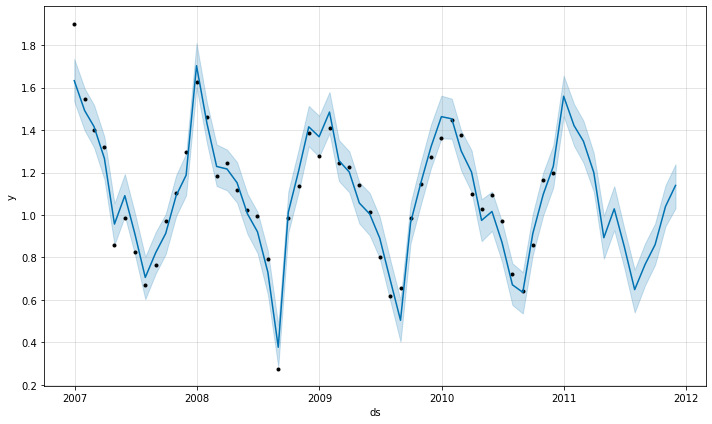

In [46]:
model.plot(forecast)
plt.show()       # this plots shows us our predicted values actually fit well on the actual values

### so what does this mean

If we look at the prediction I did, using a period of 12 months,what this means is that we have been able to make

further predictions thus extending the number of rows and columns alike

In [47]:
print(df_monthly2.shape)
print('\n')
print(forecast.shape)

(48, 2)


(60, 16)


By checking the shape of both, we can see the effect of the period. Here, the difference in rows is deficit of 12,

which is the further prediction made.


### Now let us work with Days..

#### I will try to compress all the codes to make it easier, it is the same process we did with the month

In [48]:
df_daily.head

<bound method NDFrame.head of             Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
2006-12-21             1717.112                144.166  347100.89   
2006-12-22             2341.338                186.906  347305.75   
2006-12-23             4773.386                221.470  345795.95   
2006-12-24             2550.012                149.900  348029.91   
2006-12-25             2743.120                240.280  350495.90   
2006-12-26             3934.110                165.102  347940.63   
2006-12-27             1528.760                178.902  351025.00   
2006

In [58]:
df_daily_2 = df_daily.reset_index()

In [59]:
df_daily_2.head()


,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933594
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.667969
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433594
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900391
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800781


In [60]:
df_daily_2 = df_daily_2[['datetime','Global_active_power']]

new_daily_df = df_daily_2.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [62]:
model_2 = Prophet()
model_2.fit(new_daily_df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Precious\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [67]:
#predict for the next 30 days
future = model_2.make_future_dataframe(periods=20, freq='D') 
forecast2 = model_2.predict(future) 
forecast2.head(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1635.774732,1766.003022,2858.157033,1635.774732,1635.774732,685.626843,685.626843,685.626843,203.011273,203.011273,203.011273,482.615569,482.615569,482.615569,0.0,0.0,0.0,2321.401575
1,2006-12-17,1635.639656,1725.212520,2829.555119,1635.639656,1635.639656,667.590939,667.590939,667.590939,169.659319,169.659319,169.659319,497.931620,497.931620,497.931620,0.0,0.0,0.0,2303.230595
2,2006-12-18,1635.504580,1454.019453,2589.507382,1635.504580,1635.504580,380.265208,380.265208,380.265208,-133.339553,-133.339553,-133.339553,513.604761,513.604761,513.604761,0.0,0.0,0.0,2015.769788
3,2006-12-19,1635.369503,1588.906549,2675.143935,1635.369503,1635.369503,502.732206,502.732206,502.732206,-26.497711,-26.497711,-26.497711,529.229917,529.229917,529.229917,0.0,0.0,0.0,2138.101709
4,2006-12-20,1635.234427,1634.240241,2719.308556,1635.234427,1635.234427,543.213626,543.213626,543.213626,-1.187281,-1.187281,-1.187281,544.400907,544.400907,544.400907,0.0,0.0,0.0,2178.448053
5,2006-12-21,1635.099350,1485.883701,2586.895950,1635.099350,1635.099350,409.436114,409.436114,409.436114,-149.286557,-149.286557,-149.286557,558.722671,558.722671,558.722671,0.0,0.0,0.0,2044.535465
6,2006-12-22,1634.964274,1586.273989,2701.836909,1634.964274,1634.964274,509.463663,509.463663,509.463663,-62.359490,-62.359490,-62.359490,571.823153,571.823153,571.823153,0.0,0.0,0.0,2144.427937
7,2006-12-23,1634.829198,1846.095620,2970.398800,1634.829198,1634.829198,786.375767,786.375767,786.375767,203.011273,203.011273,203.011273,583.364494,583.364494,583.364494,0.0,0.0,0.0,2421.204964
8,2006-12-24,1634.694121,1839.459576,2945.809728,1634.694121,1634.694121,762.712547,762.712547,762.712547,169.659319,169.659319,169.659319,593.053228,593.053228,593.053228,0.0,0.0,0.0,2397.406668
9,2006-12-25,1634.559045,1542.374571,2654.833751,1634.559045,1634.559045,467.309634,467.309634,467.309634,-133.339553,-133.339553,-133.339553,600.649187,600.649187,600.649187,0.0,0.0,0.0,2101.868679


In [68]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries


,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2321.401575,1766.003022,2858.157033,1635.774732,1635.774732,1635.774732
1,2006-12-17,2303.230595,1725.212520,2829.555119,1635.639656,1635.639656,1635.639656
2,2006-12-18,2015.769788,1454.019453,2589.507382,1635.504580,1635.504580,1635.504580
3,2006-12-19,2138.101709,1588.906549,2675.143935,1635.369503,1635.369503,1635.369503
4,2006-12-20,2178.448053,1634.240241,2719.308556,1635.234427,1635.234427,1635.234427
5,2006-12-21,2044.535465,1485.883701,2586.895950,1635.099350,1635.099350,1635.099350
6,2006-12-22,2144.427937,1586.273989,2701.836909,1634.964274,1634.964274,1634.964274
7,2006-12-23,2421.204964,1846.095620,2970.398800,1634.829198,1634.829198,1634.829198
8,2006-12-24,2397.406668,1839.459576,2945.809728,1634.694121,1634.694121,1634.694121
9,2006-12-25,2101.868679,1542.374571,2654.833751,1634.559045,1634.559045,1634.559045


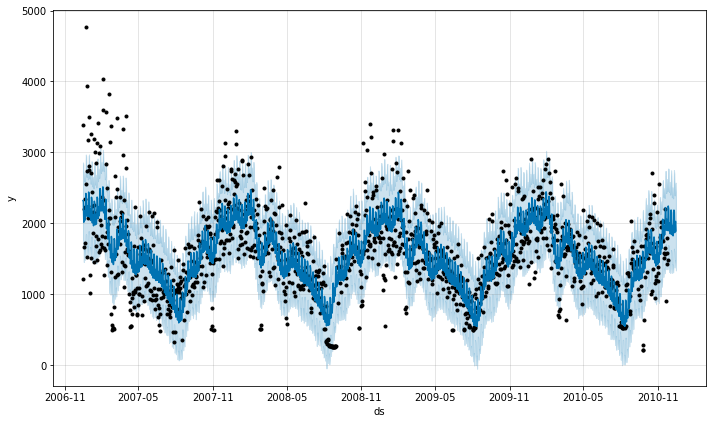

In [69]:
model_2.plot(forecast2)
plt.show()       

Now we can see the difference between both graphs.


Also let us check the shape of both actual and predicted 

In [70]:
print(df_daily_2.shape)
print('\n')
print(forecast2.shape)

(1442, 2)


(1462, 19)


The difference in values seen here is **30** which is the new rows of predictions made

This is the little so far to undertstand the dataset, I'd advice we play with it by trying out other seasons, e.g Yearly

And also try to make comparisons for Multi Variate analysis, not just this Univariate done btw Datetime and Global active power




### I would really appreciate collaboration/evaluation of the work as its still in progress

# Thank You